In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/modified_bike_sharing.csv')

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,day_name
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,Saturday


In [4]:
X = df.drop(columns=['count'],axis=1) 

In [5]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,day_name
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,Saturday


In [6]:
y = df['count']

In [7]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(10886, 19)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8708, 19), (2178, 19))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# Model Dictionary
models = { 
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Initialize lists
model_list = []
r2_list = []

# Function to evaluate model (Define this function if not already present)
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Train and Evaluate Models
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = models[model_name]
    
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(model_name)
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 141.5462
- Mean Absolute Error: 106.3137
- R2 Score: 0.3884
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 141.1528
- Mean Absolute Error: 105.3702
- R2 Score: 0.3964


Lasso
Model performance for Training set
- Root Mean Squared Error: 141.6517
- Mean Absolute Error: 106.1061
- R2 Score: 0.3875
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 141.2645
- Mean Absolute Error: 105.1167
- R2 Score: 0.3954


Ridge
Model performance for Training set
- Root Mean Squared Error: 141.5401
- Mean Absolute Error: 106.2033
- R2 Score: 0.3885
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 141.1472
- Mean Absolute Error: 105.2494
- R2 Score: 0.3964


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 102.3144
- Mean Absolute Error: 68.9455
- R2 Score: 0.6

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.960315
6,XGBRegressor,0.954309
5,Random Forest Regressor,0.952198
4,Decision Tree,0.892786
8,AdaBoost Regressor,0.667430
3,K-Neighbors Regressor,0.518943
2,Ridge,0.396413
0,Linear Regression,0.396366
1,Lasso,0.395410


In [15]:
model = CatBoostRegressor(verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 96.03


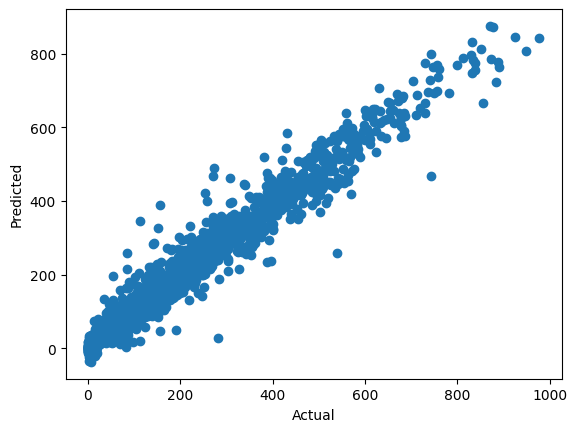

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

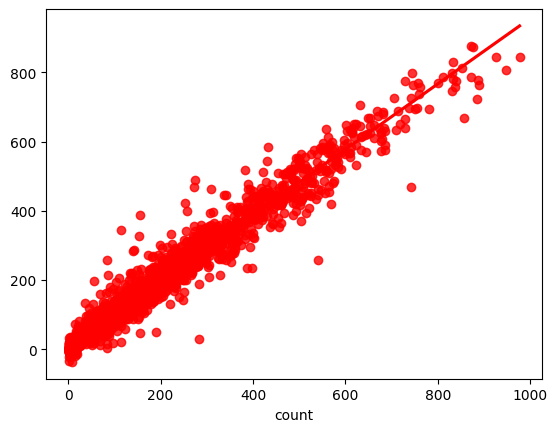

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3133,127,115.600650,11.399350
5786,13,-3.311830,16.311830
5224,163,146.344582,16.655418
8953,233,210.734030,22.265970
8054,222,224.809082,-2.809082
...,...,...,...
1963,351,322.642151,28.357849
5807,2,-0.394355,2.394355
10061,509,468.902358,40.097642
5427,5,-1.646630,6.646630
